In [ ]:
#pip install pydub

In [ ]:
#pip install librosa

In [ ]:
import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt
import pydub
import glob
import matplotlib.pyplot as plt
from pydub import AudioSegment

In [ ]:
#!unzip anjing.zip

In [ ]:
def read(f, normalized=False):
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

In [ ]:
import glob
from pydub import AudioSegment

x = []
y = []

w=2
st=1

panjang=2
s = 44100

for file_path in glob.glob('/content/anjing/kesakitan/*.mp3'):
  sr, audio = read(file_path,normalized=True)
  for i in range(0,panjang-w+1,st):
    potong =audio[i*s:(i+w)*s,0]
    potong =librosa.feature.mfcc(potong)
  x.append(potong)
  y.append(0)

for file_path in glob.glob('/content/anjing/ketakutan/*.mp3'):
  sr, audio = read(file_path,normalized=True)
  for i in range(0,panjang-w+1,st):
    potong =audio[i*s:(i+w)*s,0]
    potong =librosa.feature.mfcc(potong)
  x.append(potong)
  y.append(1)

for file_path in glob.glob('/content/anjing/marah/*.mp3'):
  sr, audio = read(file_path,normalized=True)
  for i in range(0,panjang-w+1,st):
    potong =audio[i*s:(i+w)*s,0]
    potong =librosa.feature.mfcc(potong)
  x.append(potong)
  y.append(2)

for file_path in glob.glob('/content/anjing/menangis/*.mp3'):
  sr, audio = read(file_path,normalized=True)
  for i in range(0,panjang-w+1,st):
    potong =audio[i*s:(i+w)*s,0]
    potong =librosa.feature.mfcc(potong)
  x.append(potong)
  y.append(3)

for file_path in glob.glob('/content/anjing/sedih/*.mp3'):
  sr, audio = read(file_path,normalized=True)
  for i in range(0,panjang-w+1,st):
    potong =audio[i*s:(i+w)*s,0]
    potong =librosa.feature.mfcc(potong)
  x.append(potong)
  y.append(4)

for file_path in glob.glob('/content/anjing/senang/*.mp3'):
  sr, audio = read(file_path,normalized=True)
  for i in range(0,panjang-w+1,st):
    potong =audio[i*s:(i+w)*s,0]
    potong =librosa.feature.mfcc(potong)
  x.append(potong)
  y.append(5)


In [ ]:
import random
import numpy as np
z = list(zip(x,y))
random.shuffle(z)
x,y = zip(*z)
x = np.asarray(x)
y = np.asarray(y)

In [ ]:
print(x.shape)
print(y.shape)

(32, 20, 173)
(32,)


In [ ]:
[_.shape for _ in x]

[(20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173),
 (20, 173)]

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv1D,MaxPooling1D

model=Sequential()
model.add(Conv1D(12,3,input_shape=x.shape[1:],activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(6,3,activation='relu'))
model.add(MaxPooling1D(2))

model.add(Flatten())
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 18, 12)            6240      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 9, 12)            0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 7, 6)              222       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 3, 6)             0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 18)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [ ]:
history = model.fit(x,y,batch_size=2,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 16.0120 - accuracy: 0.1600 - val_loss: 10.0639 - val_accuracy: 0.1429
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 4.4333 - accuracy: 0.4400 - val_loss: 8.9867 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 1.8742 - accuracy: 0.6000 - val_loss: 2.2128 - val_accuracy: 0.4286
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8968 - accuracy: 0.6400 - val_loss: 2.6861 - val_accuracy: 0.1429
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.8399 - accuracy: 0.6800 - val_loss: 1.4596 - val_accuracy: 0.7143
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7200 - val_loss: 1.7114 - val_accuracy: 0.7143
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8000 - val_loss: 1.6730 - val_accuracy: 0.7143
Epoch 

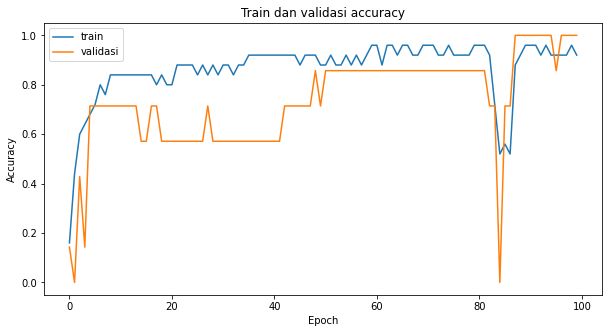

In [ ]:
# Grafik Model Akurasi
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train dan validasi accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show()

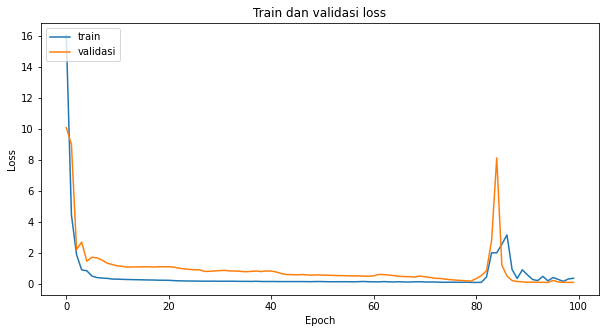

In [ ]:
# Grafik Model Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train dan validasi loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show()

In [ ]:
#model.save_weights('suara12_4.h5')

In [ ]:
#model.load_weights('/content/suara.h5')

In [ ]:
sa,xa=read('Suara Anak Anjing Ketakutan.mp3',normalized=True)

In [ ]:
xa.shape[0]//sa

44

In [ ]:
x_test=[]

for i in range(0,xa.shape[0]//sr-w+1,s):
  pot=xa[i*sa:(i+w)*sa,0]
  pot=librosa.feature.mfcc(pot)
  x_test.append(pot)
  
x_test=np.asarray(x_test)
x_test.shape
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 81ms/step


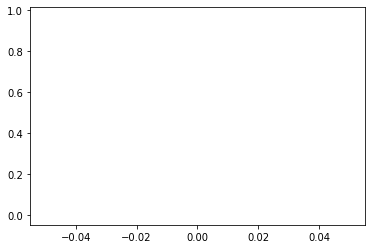

In [ ]:
plt.plot(y_pred)

In [ ]:
#from google.colab import files
#import numpy as np

#uploaded = files.upload()

#for fn in uploaded.key():
 # path = '/content/' + fn
  #sj,suara=read(path,normalized=True)
  #x_test=[]
  #for i in range(0,panjang-w+1,st):
   # pot =audio[i*s:(i+w)*s,0]
   # pot =librosa.feature.mfcc(pot)
  #x_test.append(pot)

In [ ]:
#import numpy as np
#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
  #predicting audio
 # path=fn
  #sr,xkeke=read('Kekeyi   Keke Bukan Boneka.mp3',normalized=True)
  
  
  
  #class_list = os.listdir('/content/anjing/')
  
  
 # for j in range(42):
   # if classes[0].any() :
    #  print('This audio berada di', class_list[0])
    #  break